In [1436]:
import os
os.chdir("D:/Machine_Learning")

# Importing Libraries

In [1437]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading Data

In [1438]:
titanic = pd.read_csv("D:/Machine_Learning/titanic_dataset.csv")

In [1439]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1440]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Our Dataset has 891 examples and 11 features + the target variable(Survived).

2 of the features are floats, 5 are integers and 5 are objects

In [1441]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the titanic dataset survived in the Titanic 

We can also see that the passengers ages ranges from 0.4 to 80 

Most of the Passengers are from the Class 2 & class 3

on top of that we already detect some features are having missing values like 'Age' Feature 

# Dealing with Missing Values

In [1442]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Missing_count', 'Missing_Percentage'])
    

In [1443]:
missing_percentage(titanic)

,Missing_count,Missing_Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


In [1444]:
def percent_value_count(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2))
    
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna = False))
    
    total.columns = ["Total"]
    percent.columns = ["Percent"]
    
    return pd.concat([total, percent], axis = 1)
    

Embarked Feature has 2 Null Values

In [1445]:
percent_value_count(titanic, 'Embarked')


,Total,Percent
S,644,72.28
C,168,18.86
Q,77,8.64
NaN,2,0.22


so here clearly we can see that most of the travelers are Embarked from the port Southampton

In [1446]:
titanic[titanic.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Replacing Missing values with Mode of Embarked Feature

In [1447]:
titanic['Embarked'].mode()

0    S
dtype: object

In [1448]:
common_value = 'S'
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [1449]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Replacing Missing Values with Median of Age Feature

In [1450]:
titanic.Age.fillna(titanic.Age.median(),inplace=True)

In [1451]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Converting Fare Feature from 'Float' to 'int'

In [1452]:
titanic['Fare'] = titanic['Fare'].astype(int)




In [1453]:
titanic.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int32
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 80.1+ KB


In [1454]:
titanic['Age'] = titanic['Age'].astype(int)

In [1455]:
titanic.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null int32
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: int32(2), int64(5), object(5)
memory usage: 76.6+ KB


In [1456]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,NaN,S


In [1457]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.345679,0.523008,0.381594,31.785634
std,257.353842,0.486592,0.836071,13.028212,1.102743,0.806057,49.703730
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.000000


# Analysing data by Visualization

Probabily of Survival among sex (Male & Female)

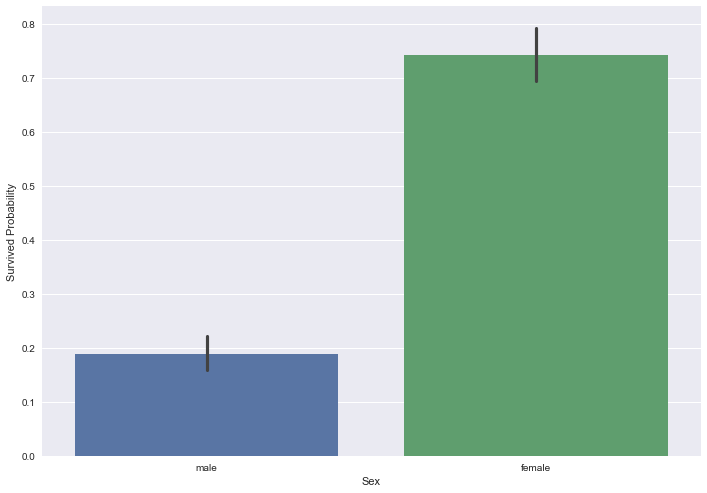

In [1458]:
g = sns.barplot(x='Sex', y='Survived', data=titanic)
g = g.set_ylabel("Survived Probability")

so we can clearly say that around 74% of the Female passengers have chance to survive in the Titanic

Only 19% of the Male have a chance of Survival in Titanic

In [1459]:
titanic[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


# Survival Probabilty for Passengers among 3 Different Pclasses

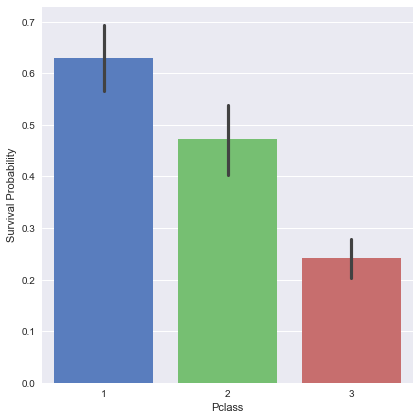

In [1460]:
g = sns.factorplot(x='Pclass', y='Survived', data=titanic, kind='bar', size=6, palette = 'muted')
g.despine(left = True)
g = g.set_ylabels("Survival Probability")

so the passengers who are travelling in Class_1(Higher_class) has the 63% chance to survive 

Passengers from class_2 has 48% chance to survive 

Passengers from class_3 has very low chance to survive and we can say that most of the passengers from the class_3 had died in Titanic Disaster

# Survival Chance among Sex across the 3 Pclasses 

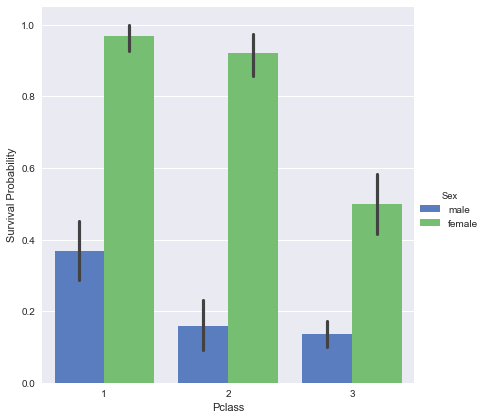

In [1461]:
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=titanic, size=6, kind='bar', palette='muted')
g.despine(left=True)
g = g.set_ylabels("Survival Probability")



We can clearly say that for both men and women the chances of survival are mostly depend on the type of Pclass they are trevalled

Across all 3 classes women have the high chance of survival 

But in class_3 the chance of survival for women is less when compared to other 2 classes

Across all 3 classes the chance of survival for Men is very less but there are high chances if the person from class_1 when compared to other 2 classes

# Survival Probability based on Pclass,Embarked & Sex

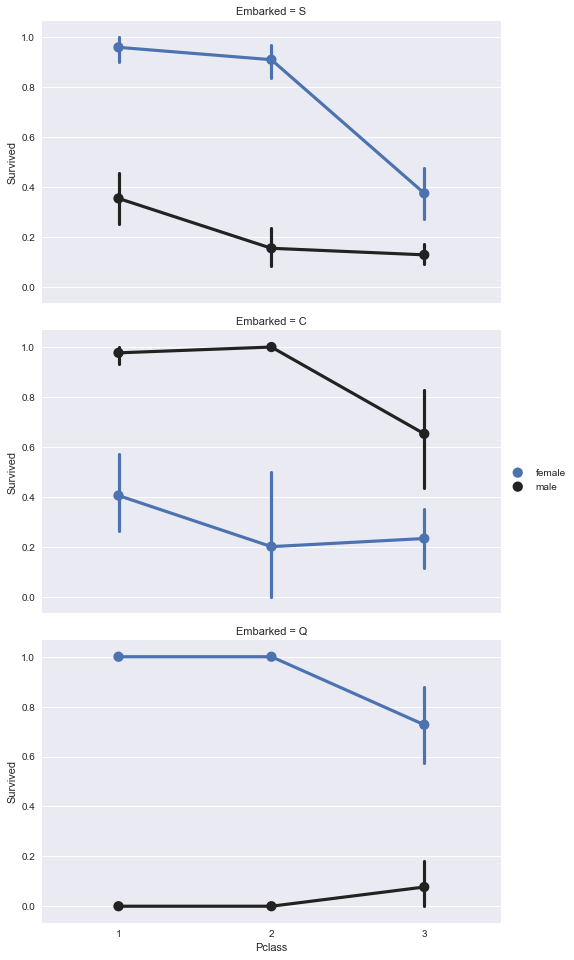

In [1462]:
FacetGrid = sns.FacetGrid(titanic, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

Embarked seems to be correlated with survival,depending on gender

Women on port Q and on port S have a higher chance of survival.The inverse is true if thet are at port C

Men have a high survival probabilty if they are on port C, but a low probability if they are on port Q and S

# Survival chance based on Age and Pclass 

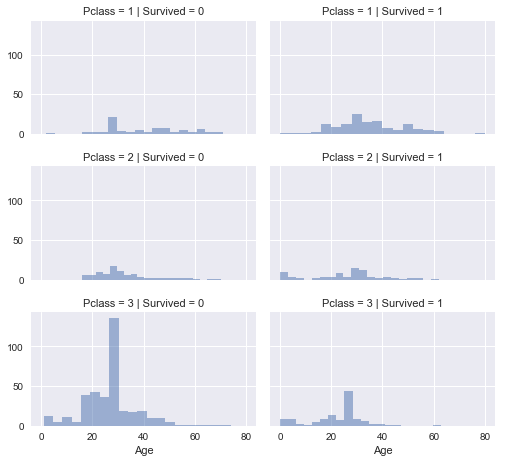

In [1463]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

It is clear that a high probability that a person in pclass3 will not survive

In pclass1 in between 23-40have high chance to survive and also for old people have higher chance to survive

In class_3 most of the young and age groups between 24-30 have high chances to survive

# Survival chance for Siblings/Spouses

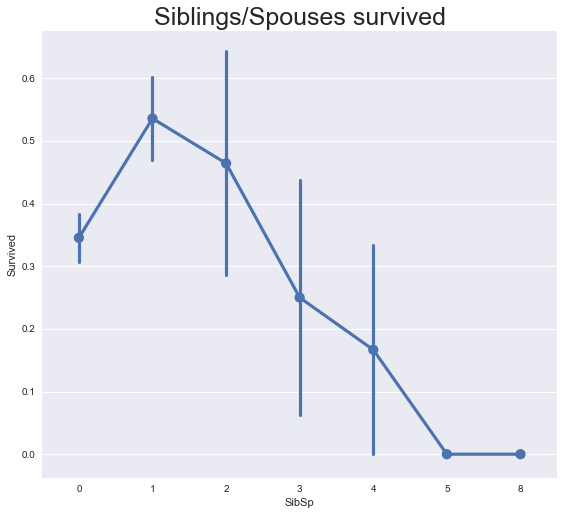

In [1464]:
sns.factorplot(x = 'SibSp',y = 'Survived', data = titanic, kind = 'point', size=8)
plt.title('Siblings/Spouses survived', fontsize=25)
plt.subplots_adjust(top=0.85)


Having 1 or 2 siblings has high chance to survive  

more than 2 siblings have less chance to survive

having more number of siblings(>5) has almost 0 chance of survival

# Chance of Survival for parents/children 

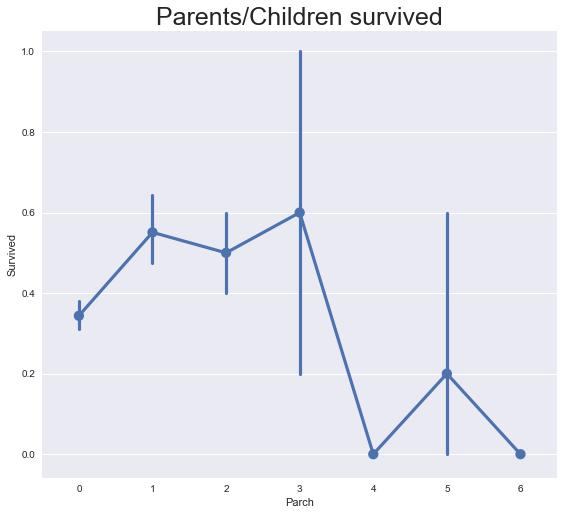

In [1465]:
sns.factorplot(x= 'Parch', y='Survived', data = titanic, kind='point', size=8)
plt.title("Parents/Children survived", fontsize=25)
plt.subplots_adjust(top=0.85)


Having 3 parent/children have more chance of survive 

the person with 1 or 2 parents/children have around 50% of the chance to survive

more than 3 parent/children has less chance of survival

# Checking for correlation between Features and Response Variable

In [1466]:
pd.DataFrame(abs(titanic.corr()['Survived']).sort_values(ascending = False))

,Survived
Survived,1.000000
Pclass,0.338481
Fare,0.257482
Parch,0.081629
Age,0.064909
SibSp,0.035322
PassengerId,0.005007


Correlation Matrix

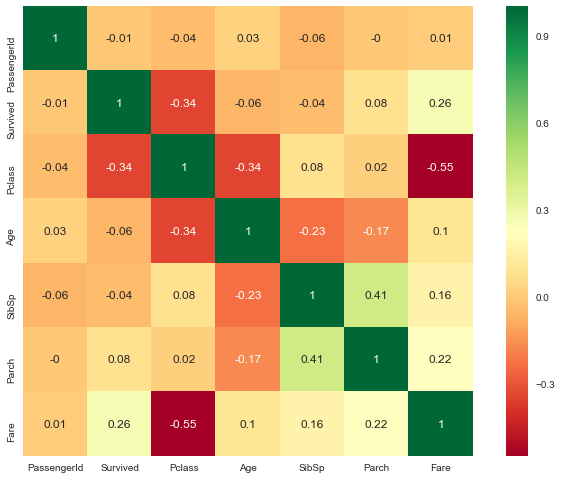

In [1467]:
sns.set(rc = {'figure.figsize':(11.8,8.27)})
sns.heatmap(titanic.corr().round(2), square=True, cmap='RdYlGn', annot=True)


Positive correlation Features: 
Fare and Survived :0.26

so it reveals that the passengers who paid more money for their ticket were more likely to survive

Negative Correlation Feature

Fare and Pclass: -0.55

Pclass and survived: -0.34

so for lower classes the the Fare will be low so that the chance of survival for passengers in lower class is minimum

Converting Sex Categorical Variables to numerical using Map function 

In [1468]:
titanic.Sex = titanic.Sex.map({'male':1,'female':0})


In [1469]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8,NaN,S


# Dropping the Unimportant Columns from the dataset

Ticket Columns has no signifance on Survival Probabilty

we can create a new feature from cabin based on characters but it is not improving probabily of survival in statsmodles so i'm removing Cabin Feature

we can aslo create title from the Name of the passenger but it is not improving the probability of chance and also leads to poor performance of Evaluation matrix so i'm removing Name Columns

In [1470]:
titanic.drop(['Ticket'],axis=1,inplace=True)
titanic.drop(['Cabin'],axis=1,inplace=True)
titanic.drop(['PassengerId'],axis=1,inplace=True)
titanic.drop(['Name'],axis=1,inplace=True)


In [1471]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,S
1,1,1,0,38,1,0,71,C
2,1,3,0,26,0,0,7,S
3,1,1,0,35,1,0,53,S
4,0,3,1,35,0,0,8,S


Converting Embarked Categorical Variables to numerical using Map function

In [1472]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [1473]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7,0
1,1,1,0,38,1,0,71,1
2,1,3,0,26,0,0,7,0
3,1,1,0,35,1,0,53,0
4,0,3,1,35,0,0,8,0


In [1474]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null int32
Embarked    891 non-null int64
dtypes: int32(2), int64(6)
memory usage: 48.8 KB


# Creating Dummies for Categorical Variables 

In [1475]:
dummy_Pclass = pd.get_dummies(titanic['Pclass'],prefix='Pclass')

In [1476]:
dummy_Pclass.head()

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


Removing one of the dummy_variable prevents from multi-collineairty so i'm removing Pclass_1

In [1477]:
titanic = titanic.join(dummy_Pclass.drop('Pclass_1',axis=1))

In [1478]:
titanic.drop("Pclass",axis=1,inplace=True)

In [1479]:
dummy_Embarked = pd.get_dummies(titanic['Embarked'],prefix='Embarked')

In [1480]:
dummy_Embarked.head()

,Embarked_0,Embarked_1,Embarked_2
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1481]:
titanic = titanic.join(dummy_Embarked.drop('Embarked_0',axis=1))

In [1482]:
titanic.drop("Embarked",axis=1,inplace=True)

In [1483]:
titanic.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_1,Embarked_2
0,0,1,22,1,0,7,0,1,0,0
1,1,0,38,1,0,71,0,0,1,0
2,1,0,26,0,0,7,0,1,0,0
3,1,0,35,1,0,53,0,0,0,0
4,0,1,35,0,0,8,0,1,0,0


# Model Building

Logistic Regression using Scikit-leran

In [1484]:
from sklearn.model_selection import train_test_split

Divide Data in to train and test sets

In [1485]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'],test_size=0.2, random_state=156)


In [1486]:
from sklearn.linear_model import LogisticRegression

In [1487]:
logit = LogisticRegression()

In [1488]:
logit.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1489]:
logit.classes_

array([0, 1], dtype=int64)

In [1490]:
logit.coef_

array([[-2.5121224 , -0.02878824, -0.27561988, -0.0894703 ,  0.00308773,
        -0.55831948, -1.66731992,  0.60006521,  0.2572451 ]])

In [1491]:
logit.predict(X_test)

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [1492]:
logit.score(X_test, Y_test)


0.7988826815642458

# Logistic Regression using Statsmodels

Divide Data in to train and test sets

In [1493]:
from sklearn.model_selection import train_test_split

In [1494]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop('Survived', axis=1), titanic['Survived'],test_size=0.2, random_state=156)

Import statsmodels api and add an intercept term.

In [1495]:
import statsmodels.api as sm


In [1496]:
X_train = sm.add_constant(X_train)




In [1497]:
X_test = sm.add_constant(X_test)



In [1498]:
logit = sm.GLM(Y_train, X_train, family=sm.families.Binomial())


In [1499]:
result = logit.fit()

In [1500]:
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Survived   No. Observations:                  712
Model:                            GLM   Df Residuals:                      702
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -312.92
Date:                Tue, 17 Dec 2019   Deviance:                       625.83
Time:                        11:15:09   Pearson chi2:                     729.
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8294      0.509      7.520      0.000       2.831       4.828
Sex           -2.7908      0.228    -12.255      0.0

In [1501]:
print(result.summary2())


               Results: Generalized linear model
Model:              GLM              AIC:            645.8307  
Link Function:      logit            BIC:            -3984.9600
Dependent Variable: Survived         Log-Likelihood: -312.92   
Date:               2019-12-17 11:15 LL-Null:        -472.54   
No. Observations:   712              Deviance:       625.83    
Df Model:           9                Pearson chi2:   729.      
Df Residuals:       702              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           3.8294   0.5092   7.5199 0.0000  2.8313  4.8275
Sex            -2.7908   0.2277 -12.2545 0.0000 -3.2371 -2.3444
Age            -0.0401   0.0087  -4.6257 0.0000 -0.0571 -0.0231
SibSp          -0.3244   0.1223  -2.6522 0.0080 -0.5642

# Stepwise-Backward Elimination

Removing 'Parch' Feature because it is having higher P-value

In [1502]:
X_train.drop("Parch",axis=1,inplace=True)


In [1503]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            644.4926  
Link Function:      logit            BIC:            -3990.8662
Dependent Variable: Survived         Log-Likelihood: -313.25   
Date:               2019-12-17 11:15 LL-Null:        -472.54   
No. Observations:   712              Deviance:       626.49    
Df Model:           8                Pearson chi2:   733.      
Df Residuals:       703              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           3.7996   0.5063   7.5040 0.0000  2.8072  4.7920
Sex            -2.7514   0.2215 -12.4203 0.0000 -3.1855 -2.3172
Age            -0.0399   0.0086  -4.6168 0.0000 -0.0568 -0.0230
SibSp          -0.3484   0.1193  -2.9194 0.0035 -0.5823

Removing 'Fare' Feature

In [1504]:
X_train.drop("Fare",axis=1,inplace=True)


In [1505]:
print(sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit().summary2())


               Results: Generalized linear model
Model:              GLM              AIC:            642.5098  
Link Function:      logit            BIC:            -3997.4170
Dependent Variable: Survived         Log-Likelihood: -313.25   
Date:               2019-12-17 11:15 LL-Null:        -472.54   
No. Observations:   712              Deviance:       626.51    
Df Model:           7                Pearson chi2:   733.      
Df Residuals:       704              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           3.8260   0.4647   8.2340 0.0000  2.9153  4.7367
Sex            -2.7537   0.2209 -12.4678 0.0000 -3.1865 -2.3208
Age            -0.0400   0.0086  -4.6439 0.0000 -0.0569 -0.0231
SibSp          -0.3461   0.1180  -2.9328 0.0034 -0.5774

Removing 'Embarked_2' feature

In [1506]:
X_train.drop("Embarked_2",axis=1,inplace=True)


In [1507]:
result = sm.GLM(Y_train, X_train, family=sm.families.Binomial()).fit()

In [1508]:
print(result.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            641.2343  
Link Function:      logit            BIC:            -4003.2606
Dependent Variable: Survived         Log-Likelihood: -313.62   
Date:               2019-12-17 11:15 LL-Null:        -472.54   
No. Observations:   712              Deviance:       627.23    
Df Model:           6                Pearson chi2:   726.      
Df Residuals:       705              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           3.8525   0.4647   8.2904 0.0000  2.9417  4.7632
Sex            -2.7768   0.2200 -12.6234 0.0000 -3.2079 -2.3457
Age            -0.0398   0.0086  -4.6182 0.0000 -0.0566 -0.0229
SibSp          -0.3586   0.1178  -3.0449 0.0023 -0.5894

so from Beta-coefficients we can clearly say that

if one person increases in the Pclass_2 will lead to decrease 10% chance of survival in that class

if one person increases in the Pclass_3 will lead to decrease 22% chance of survival in that class

for chance of one person increases by 56% if that person at port 'Southampeton'

from sex and Age coefficients we can understand that the chance of survival for women,kids,and old age people are high 

We see that the remaining predictors at this step are all significant. So, we keep this as our final model.

In [1509]:
result.deviance


627.2343339239467

In [1510]:
result.aic

641.2343339239467

We see that AIC has improved and earlier we were being penalized for adding non-useful predictors in our model. Deviance is also to its real value now.

Next, we make predictions on the test set.



In [1511]:
X_test = sm.add_constant(X_test[['Sex', 'Age', 'SibSp','Pclass_2','Pclass_3','Embarked_1']])

In [1512]:
probabilities = result.predict(X_test)

In [1513]:
probabilities.head()

748    0.490428
847    0.114980
760    0.088749
35     0.278349
871    0.835532
dtype: float64

In [1514]:
predicted_classes = probabilities.map(lambda x:'1' if x>0.5 else "0")

In [1515]:
predicted_classes.head()

748    0
847    0
760    0
35     0
871    1
dtype: object

Fit Logistic Regression model.



In [1516]:
from sklearn.linear_model import LogisticRegression

In [1517]:
model = LogisticRegression()

In [1518]:
model.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1519]:
model.score(X_train,Y_train)

0.8033707865168539

Make class predictions.

In [1520]:
predictions = model.predict(X_test)

Calculate accuracy score.

In [1521]:
model.score(X_test, Y_test)

0.7988826815642458

Calculate Error rate.

In [1522]:
1-model.score(X_test, Y_test)

0.2011173184357542

Calculate Accuracy

In [1523]:
from sklearn.metrics import accuracy_score

Calculate number of correctly classified observations.

In [1524]:
accuracy_score(Y_test, predictions, normalize=False)

143

Calculate number of incorrectly classified observations.

In [1525]:
len(Y_test) - accuracy_score(Y_test, predictions, normalize=False)


36

In [1526]:
model.score(X_test,Y_test)

0.7988826815642458

In [1527]:
accuracy_score(Y_test,predictions)

0.7988826815642458

Calculate log loss

In [1528]:
from sklearn.metrics import log_loss

In [1529]:
import numpy as np

In [1530]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0], dtype=int64)

In [1531]:
log_loss(Y_test,predictions)


6.946413095967807

# Calculate Confusion Matrix

In [1532]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1533]:
confusion_mat = confusion_matrix(Y_test, predictions)

In [1534]:
confusion_df = pd.DataFrame(confusion_mat, index=['Not Survived','Survived'],columns=['Not survived','Survived'])

In [1535]:
confusion_df


,Not survived,Survived
Not Survived,92,15
Survived,21,51


# Confusion Matrix

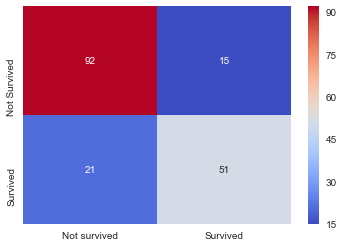

In [1536]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

Calculate precision and recall scores


In [1537]:
from sklearn.metrics import precision_score,recall_score

In [1538]:
precision_score(Y_test, predictions)

0.7727272727272727

In [1539]:
recall_score(Y_test, predictions)




0.7083333333333334

Calculate F1 Score

In [1540]:
from sklearn.metrics import f1_score


In [1541]:
f1_score(Y_test, predictions)


0.7391304347826088

Calculate Area under the ROC curve and also plot the ROC curve

In [1542]:
from sklearn.metrics import roc_curve,roc_auc_score


Let's take probablities from our classifier, instead of classes.

In [1543]:
probs = model.predict_proba(X_test)[::,1]


In [1544]:
auc = roc_auc_score(Y_test, probs)

In [1545]:
print(auc)

0.8483904465212876


In [1546]:
fpr, tpr, threshold = roc_curve(Y_test, probs)


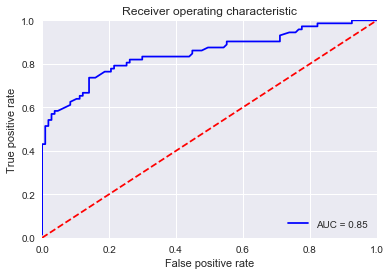

In [1547]:
plt.title("Receiver operating characteristic")
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' %auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

We can also calculate the optimal threshold probability from this ROC curve

In [1548]:
optimal_idx = np.argmax(tpr - fpr)


In [1549]:
optimal_threshold = threshold[optimal_idx]


In [1550]:
optimal_threshold

0.49250161096084405

Updata model based on optimal probability threshold

Let's use this new optimal threshold and update our predictions

In [1551]:
new_predictions = np.where(probs>optimal_threshold,1,0)


In [1552]:
new_confusion_mat = confusion_matrix(Y_test, new_predictions)



In [1553]:
new_confusion_df = pd.DataFrame(new_confusion_mat, index = ['Actual neg','Actual pos'],columns = ['predicted neg','predicted pos'])

In [1554]:
new_confusion_df

,predicted neg,predicted pos
Actual neg,92,15
Actual pos,20,52


Calculate the updated accuracy score and log loss metrics.

In [1555]:
accuracy_score(Y_test,new_predictions)

0.8044692737430168

In [1556]:
log_loss(Y_test, new_predictions)

6.75345903789568

We see that both the accuracy score and log loss metrics show that model has  improved.